In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import gc

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [3]:
str_col = ['day_of_week','start_turn_restricted','end_turn_restricted']
for i in str_col:
    le = LabelEncoder()
    le=le.fit(train[i])
    train[i]=le.transform(train[i])
    
    for label in np.unique(test[i]):
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test[i]=le.transform(test[i])

In [4]:
y_train = train['target'] 

X_train = train.drop(['id','base_date', 'target','road_name', 'start_node_name', 'end_node_name','vehicle_restricted'], axis=1)

X_test = test.drop(['id','base_date', 'road_name', 'start_node_name', 'end_node_name','vehicle_restricted'], axis=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(4701217, 16)
(4701217,)
(291241, 16)


In [6]:
# RandomForestRegressor 튜닝

# GridSearchcv 로 튜닝은?

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor



params = { 'n_estimators' : [2, 5 ,100], 'max_depth':[6,8,10,12],
          'min_samples_leaf':[8,12,18],'min_samples_split':[8,16,20]
}


model_3 = RandomForestRegressor()


grid_cv = GridSearchCV(model_3 , param_grid = params , cv = 2 , n_jobs = -1)

grid_cv.fit(X_train , y_train)

# RandomForestRegressor을 GridSearchcv 로 하이퍼 파라미터 튜닝하고 내고!

# ExtraForestRegressor을  GridSearchcv 로 하이퍼 파라미터 튜닝하고 내고!

# 다른 모델로도 하나 내고!

GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [2, 5, 100]})

In [7]:
grid_cv.best_params_

{'max_depth': 12,
 'min_samples_leaf': 8,
 'min_samples_split': 20,
 'n_estimators': 5}

In [8]:
y_pred = grid_cv.predict(X_test)

C:\Users\X1Carbon\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\X1Carbon\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

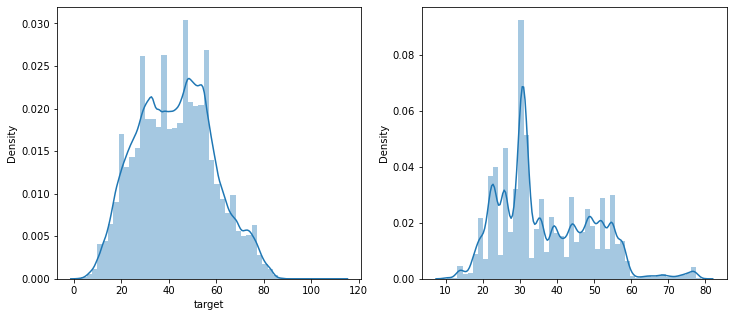

In [10]:
fig , (ax1 , ax2) = plt.subplots(ncols = 2)

fig.set_size_inches(12, 5)

sns.distplot(y_train , ax = ax1 , bins = 50)

sns.distplot(y_pred , ax = ax2 , bins = 50)







In [11]:
sample_submission = pd.read_csv("sample_submission.csv")

sample_submission

,id,target
0,TEST_000000,0
1,TEST_000001,0
2,TEST_000002,0
3,TEST_000003,0
4,TEST_000004,0
...,...,...
291236,TEST_291236,0
291237,TEST_291237,0
291238,TEST_291238,0
291239,TEST_291239,0


In [12]:
sample_submission['target'] = y_pred

print(sample_submission.shape)


sample_submission.head(10)


(291241, 2)


,id,target
0,TEST_000000,30.727884
1,TEST_000001,44.515706
2,TEST_000002,57.641445
3,TEST_000003,31.914401
4,TEST_000004,43.568990
5,TEST_000005,50.832981
6,TEST_000006,31.357634
7,TEST_000007,66.652366
8,TEST_000008,54.568973
9,TEST_000009,50.802340


In [13]:
sample_submission.to_csv("RandomForest Tunning.csv", index = False)


# 이건 어떻게 나올까? 점수는 4.8 성적이 더 떨어짐.

# RandomFrores 는 쓰지말자!